## Main Challenge

For this challenge, you are given various stocks and then are also given an ETF. However, when you open up the data, you will notice that the data is a little messy. Your first job is to clean the data before you work with it. Your goal for this problem is to find all potential mispricings in the ETF and areas where you can capture a profitable position. After you have finished, you are required to summarize your thought process behind your code. Your goal is not to calculate the profit and loss of your trades, but track the places where you see a opportunity to profit. (This could be having a short or long position). A completed project would consist of the following:
- Graph of ETF with blue and red arrows indicating where you would ideally enter a position or close a position.
- Summary describing what specific types of traders would be ideal in that situation and where you think the ETF was mispriced.

You will be graded on how well-written your code is, the strategies you come up with, and your overall documentation. The only packages that you are allowed to implement are pandas, numpy, and matplotlib. These packages are completely optional to use. AI is allowed as long as you document where you use it. Finally, documentation is required and typing is highly recommended.  Happy coding :)

## Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Clean Data

In [ ]:
df = pd.read_csv('price_data.csv')
df = df.apply(pd.to_numeric, errors = 'coerce')

df_cleaned = df.fillna(method = 'ffill')
df_cleaned = df_cleaned.drop_duplicates()

df_cleaned[df_cleaned < 0] = np.nan
df_cleaned = df_cleaned.fillna(method = 'ffill')

df_cleaned.to_csv('cleaned_price_data.csv', index = False)

print(df_cleaned.head())

     Stock A     Stock B     Stock C    Stock D         ETF
0  72.822966  248.864568  315.063032  62.138855  102.020028
1  72.786380  248.827537  315.298371  62.883036  109.073323
2  72.587488  249.736173  317.299603  63.191862  107.832533
3  72.857774  248.945538  319.427836  63.532602  115.041424
4  72.322407  249.010452  319.450086  63.649735  115.777109


/var/folders/ml/7r_xsyp90hv4tnwf6pxm_g7w0000gn/T/ipykernel_20278/280503344.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df.fillna(method = 'ffill') #handles any missing values using forward fill
/var/folders/ml/7r_xsyp90hv4tnwf6pxm_g7w0000gn/T/ipykernel_20278/280503344.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.fillna(method = 'ffill') #applies forward fill then


## Strategy and Bonus

/var/folders/ml/7r_xsyp90hv4tnwf6pxm_g7w0000gn/T/ipykernel_20278/3279368608.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/var/folders/ml/7r_xsyp90hv4tnwf6pxm_g7w0000gn/T/ipykernel_20278/3279368608.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


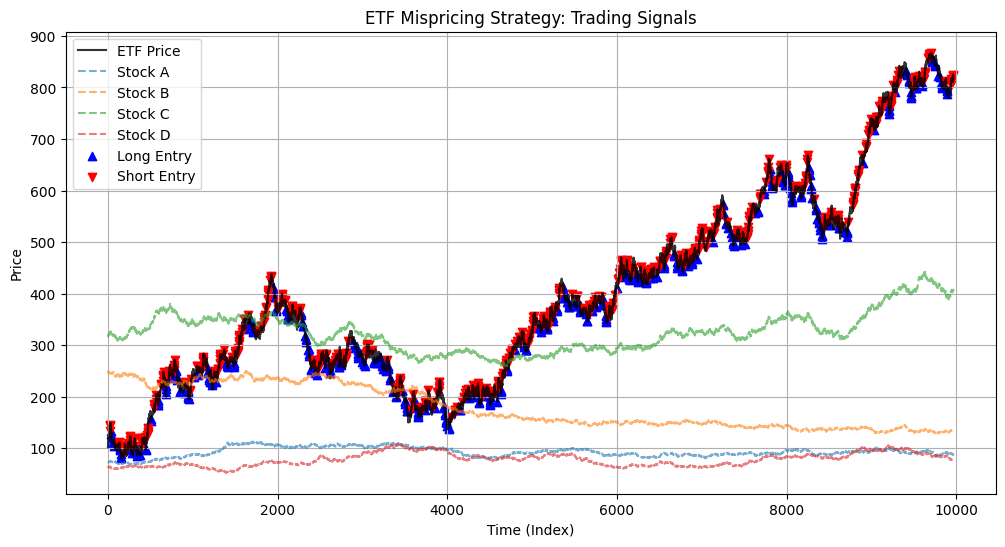

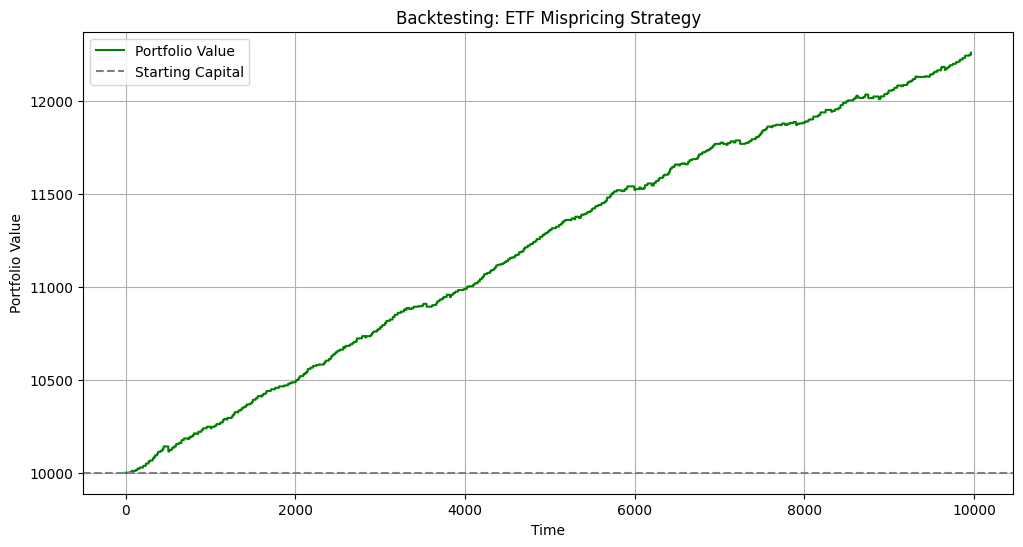

The ETF strategy increased the portfolio value from $10,000 to approximately $12260.52, yielding a 22.61% return over the test period.


In [ ]:

def load_and_clean_data(file_path: str) -> pd.DataFrame:
    df = pd.read_csv(file_path)
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.fillna(method='ffill')
    df[df < 0] = np.nan
    df = df.fillna(method='ffill')
    return df

def compute_mispricing(df: pd.DataFrame) -> pd.DataFrame:
    df["Synthetic_ETF"] = df[["Stock A", "Stock B", "Stock C", "Stock D"]].mean(axis=1)
    df["Mispricing"] = df["ETF"] - df["Synthetic_ETF"]
    window = 20
    df["Mispricing_Z"] = (df["Mispricing"] - df["Mispricing"].rolling(window).mean()) / df["Mispricing"].rolling(window).std()
    return df

def generate_trading_signals(df: pd.DataFrame, z_threshold: float = 2) -> pd.DataFrame:
    df["Long_Signal"] = df["Mispricing_Z"] < -z_threshold
    df["Short_Signal"] = df["Mispricing_Z"] > z_threshold
    return df

def backtest_strategy(df: pd.DataFrame, initial_capital: float = 10000) -> pd.Series:
    capital = initial_capital
    position = 0
    capital_over_time = []
    
    for i in range(len(df)):
        price = df["ETF"].iloc[i]
        
        if df["Long_Signal"].iloc[i]:
            position = 1
            entry_price = price
        elif df["Short_Signal"].iloc[i]:
            position = -1
            entry_price = price
        elif position == 1 and df["Mispricing_Z"].iloc[i] > -0.5:
            capital += (price - entry_price)
            position = 0
        elif position == -1 and df["Mispricing_Z"].iloc[i] < 0.5:
            capital += (entry_price - price)
            position = 0
        
        capital_over_time.append(capital)
    
    return pd.Series(capital_over_time)

def plot_results(df: pd.DataFrame, capital_over_time: pd.Series):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df["ETF"], label="ETF Price", color="black", alpha=0.8, linewidth=1.5)
    plt.plot(df.index, df["Stock A"], linestyle="--", label="Stock A", alpha=0.6)
    plt.plot(df.index, df["Stock B"], linestyle="--", label="Stock B", alpha=0.6)
    plt.plot(df.index, df["Stock C"], linestyle="--", label="Stock C", alpha=0.6)
    plt.plot(df.index, df["Stock D"], linestyle="--", label="Stock D", alpha=0.6)
    plt.scatter(df.index[df["Long_Signal"]], df["ETF"][df["Long_Signal"]], color="blue", label="Long Entry", marker="^", alpha=1)
    plt.scatter(df.index[df["Short_Signal"]], df["ETF"][df["Short_Signal"]], color="red", label="Short Entry", marker="v", alpha=1)
    plt.xlabel("Time (Index)")
    plt.ylabel("Price")
    plt.title("ETF Mispricing Strategy: Trading Signals")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(capital_over_time, label="Portfolio Value", color="green")
    plt.axhline(10000, linestyle="--", color="gray", label="Starting Capital")
    plt.xlabel("Time")
    plt.ylabel("Portfolio Value")
    plt.title("Backtesting: ETF Mispricing Strategy")
    plt.legend()
    plt.grid(True)
    plt.show()

file_path = "cleaned_price_data.csv"
df = load_and_clean_data(file_path)
df = compute_mispricing(df)
df = generate_trading_signals(df)
capital_over_time = backtest_strategy(df)
plot_results(df, capital_over_time)

final_capital = capital_over_time.iloc[-1]

## Summary

In [ ]:
'''
I import the necessary libraries: pandas, numpy, and matplotlib.
I load the CSV file named 'price_data.csv'
I convert all columns to numeric values, coercing errors
I fill any missing values using forward fill
I remove duplicate rows from the data.
I replace any negative values with NaN and fill them using forward fill
I save the cleaned data to 'cleaned_price_data.csv'
I print the first few rows of the cleaned dataset
I load CSV data and convert columns to numbers
I fill missing or negative values using forward fill
I compute a synthetic ETF price by averaging four stocks
I calculate mispricing as the difference between the ETF and the synthetic price
I generate a rolling Z-score for mispricing
I create long signals when the Z-score is very low and short signals when it's very high
I backtest the strategy by simulating trades based on these signals
I plot the price data with trading signals and the portfolio value over time
'''

"\nI import the necessary libraries: pandas, numpy, and matplotlib.\nI load the CSV file named 'price_data.csv'.\nI convert all columns to numeric values, coercing errors.\nI fill any missing values using forward fill.\nI remove duplicate rows from the data.\nI replace any negative values with NaN and fill them using forward fill.\nI save the cleaned data to 'cleaned_price_data.csv'.\nI print the first few rows of the cleaned dataset.\nI load CSV data and convert columns to numbers\nI fill missing or negative values using forward fill\nI compute a synthetic ETF price by averaging four stocks\nI calculate mispricing as the difference between the ETF and the synthetic price\nI generate a rolling Z-score for mispricing\nI create long signals when the Z-score is very low and short signals when it's very high\nI backtest the strategy by simulating trades based on these signals\nI plot the price data with trading signals and the portfolio value over time\n"

## Bonus
Calculate the Profit and Loss of your strategy.